In [202]:
#import both csv files and load into dataframes
import pandas as pd 
rounds2 = pd.read_csv("rounds2.csv",encoding="ISO-8859-1")
companies = pd.read_csv("companies.csv",encoding="ISO-8859-1")

In [203]:
# we need to convert columns to lower case to avoid duplicate cases
rounds2.company_permalink = rounds2.company_permalink.apply(lambda x: x.lower())
companies.permalink = companies.permalink.apply(lambda x: x.lower())
companies['name']=companies['name'].str.lower()

In [204]:
# get number of unique companies in rounds2
len(rounds2.company_permalink.unique())

66370

In [205]:
# get number of unique companies in companies dataframe
len(companies.name.unique())


66038

In [206]:
# merge both data frames to get all clumns in one data frame
master_frame = pd.merge(rounds2,companies, left_on="company_permalink", right_on="permalink", how='left')

In [207]:
master_frame.shape

(114949, 16)

In [212]:
# finding all null entries
master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         77275
funded_at                      0
raised_amount_usd          18325
permalink                      7
name                           7
homepage_url                5320
category_list               2390
status                         7
country_code                6836
state_code                  8942
region                      8202
city                        8199
founded_at                 17850
dtype: int64

In [213]:
# Here we remove  those entries where status is close, as we know that no investmnet is going to happen
master_frame = master_frame[master_frame['status']!='closed']

In [214]:
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/organization/-qounter,:qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04/09/2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/organization/-qounter,:qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04/09/2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(the) one of them,inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01/01/2007


In [215]:
# find out null entries for raised_amount_usd
master_frame[master_frame['raised_amount_usd'].isna()]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/organization/-qounter,:qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04/09/2014
5,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN,/organization/004-technologies,004 technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01/01/2010
14,/organization/1,/funding-round/5de6d8828aef7d925d97918d15727670,undisclosed,NaN,05-02-2013,NaN,/organization/1,one inc.,http://whatis1.com,Mobile,operating,USA,CA,SF Bay Area,San Francisco,01/08/2011
17,/organization/1-4-all,/funding-round/e97a192e13ea0ee3c4f71136b4f3ec16,equity_crowdfunding,NaN,21-04-2013,NaN,/organization/1-4-all,1-4 all,NaN,Entertainment|Games|Software,operating,USA,NC,NC - Other,Connellys Springs,NaN
18,/organization/1-618-technology,/funding-round/83b8f4c7d37ecef5e001a5e953bf461a,equity_crowdfunding,NaN,22-01-2014,NaN,/organization/1-618-technology,1.618 technology,http://www.Homeandcondogallery.com,Networking|Real Estate|Web Hosting,operating,USA,FL,Orlando,Orlando,07/12/2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114899,/organization/zymr-inc-,/funding-round/9048d1a80edeae803ed1790c9f473eec,angel,NaN,12-12-2012,NaN,/organization/zymr-inc-,"zymr, inc.",http://www.zymr.com,Android|Apps|Cloud Computing|Cloud Infrastruct...,operating,USA,CA,SF Bay Area,Santa Clara,NaN
114905,/organization/zynergy-projects-services,/funding-round/3d7dbd2d92220d93e2b5455f914a0918,venture,NaN,19-08-2015,NaN,/organization/zynergy-projects-services,zynergy projects & services,http://www.zynergygroup.net/,Clean Technology,operating,IND,25,Chennai,Chennai,NaN
114913,/organization/zynga,/funding-round/d27f10a20b15b4ef3d9961d54eabf6b1,angel,NaN,01-01-2007,NaN,/organization/zynga,zynga,http://www.zynga.com,Facebook Applications|Games|Networking|Technology,ipo,USA,CA,SF Bay Area,San Francisco,01/07/2007
114927,/organization/zypsee,/funding-round/c67e22c5448435adaf5a2d101e449dde,seed,NaN,26-07-2013,NaN,/organization/zypsee,whisk (formerly zypsee),http://whisk.me,Public Transportation,operating,USA,NY,New York City,New York,01/01/2011


In [216]:
# remove all the rows where raised_amount_usd is null
master_frame = master_frame[pd.notnull(master_frame['raised_amount_usd'])]

In [217]:
# remove all the rows where country code is null ,as we need to use country code in further calcualtions
master_frame = master_frame[pd.notnull(master_frame['country_code'])]

In [218]:
# Let us convert amound raised into millions usd and rename the column
master_frame['raised_amount_usd']=master_frame['raised_amount_usd'].apply(lambda val: round(val/1000000,3))
master_frame=master_frame.rename(columns = {'raised_amount_usd':'raised_amount_usd_million'})

In [219]:
master_frame


,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd_million,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10.000,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,0.700,/organization/-qounter,:qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04/09/2014
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2.000,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01/01/2007
6,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,01-07-2014,0.041,/organization/01games-technology,01games technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN
7,/organization/0ndine-biomedical-inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,11-09-2009,0.043,/organization/0ndine-biomedical-inc,ondine biomedical inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01/01/1997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114942,/organization/zzzzapp-com,/funding-round/22ef2fafb4d20ac3aa4b86143dbf6c8e,seed,NaN,01-11-2011,0.007,/organization/zzzzapp-com,zzzzapp wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13/05/2012
114943,/organization/zzzzapp-com,/funding-round/6ba41360588bc6e3f77e9b50a0ebfafa,seed,NaN,01-08-2013,0.033,/organization/zzzzapp-com,zzzzapp wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13/05/2012
114944,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,0.041,/organization/zzzzapp-com,zzzzapp wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13/05/2012
114945,/organization/zzzzapp-com,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,0.033,/organization/zzzzapp-com,zzzzapp wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13/05/2012


In [220]:
# we need to find mean for each funding type, so that we can judge the funding sector required
master_frame.groupby('funding_round_type')['raised_amount_usd_million'].mean()

funding_round_type
angel                      0.994756
convertible_note           1.340013
debt_financing            17.891010
equity_crowdfunding        0.511266
grant                      4.286176
non_equity_assistance      0.460610
post_ipo_debt            175.469739
post_ipo_equity           67.093605
private_equity            75.797196
product_crowdfunding       1.521047
secondary_market          94.089400
seed                       0.763097
undisclosed               16.018211
venture                   11.903153
Name: raised_amount_usd_million, dtype: float64

In [221]:
# from above we decide the venture type is the right option for investment, so filter the data out
master_frame_vent = master_frame[master_frame.funding_round_type == 'venture']

In [222]:
master_frame_vent

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd_million,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10.000,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2.000,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01/01/2007
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,0.719,/organization/0ndine-biomedical-inc,ondine biomedical inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01/01/1997
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20.000,/organization/0xdata,h2o.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01/01/2011
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1.700,/organization/0xdata,h2o.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01/01/2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114923,/organization/zyomyx-inc,/funding-round/ea5b21da6cf999ff4d5667431fe318d7,venture,NaN,29-01-2010,0.555,/organization/zyomyx-inc,zyomyx,http://www.zyomyx.com,Biotechnology,operating,USA,MO,MO - Other,Fremont,01/01/1998
114934,/organization/zyrra,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,NaN,18-10-2012,0.141,/organization/zyrra,zyrra,http://www.zyrra.com,E-Commerce,operating,USA,MA,Boston,Cambridge,NaN
114936,/organization/zystor,/funding-round/7ea37c0ff4132b084832039a9380d34e,venture,A,16-12-2004,8.500,/organization/zystor,zystor,http://www.zystor.com,Biotechnology,acquired,USA,WI,Milwaukee,Milwaukee,NaN
114937,/organization/zytoprotec,/funding-round/0c43e717298296d2fb334fb236300f6e,venture,A,29-01-2013,2.687,/organization/zytoprotec,zytoprotec,http://www.zytoprotec.com,Biotechnology,operating,AUT,3,Vienna,Gerasdorf Bei Wien,01/01/2007


In [223]:
# find out total null entries in filtered data
master_frame_vent.isna().sum()

company_permalink                0
funding_round_permalink          0
funding_round_type               0
funding_round_code           19874
funded_at                        0
raised_amount_usd_million        0
permalink                        0
name                             0
homepage_url                  1983
category_list                  201
status                           0
country_code                     0
state_code                     696
region                         549
city                           549
founded_at                    7506
dtype: int64

In [225]:
# group data by country_code and sum up the raised amount and get top 9 values
top9 = master_frame_vent.groupby('country_code',as_index=False)['raised_amount_usd_million'].sum().sort_values(by = ['raised_amount_usd_million'],ascending=False).head(9)

In [226]:
top9

,country_code,raised_amount_usd_million
94,USA,399935.179
15,CHN,39101.773
29,GBR,18241.345
39,IND,14050.604
12,CAN,8825.477
28,FRA,6775.039
42,ISR,6503.020
21,DEU,6061.141
45,JPN,3242.031


In [227]:
# read the csv file mapping
mapping=pd.read_csv('mapping.csv')

In [228]:
mapping

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
683,Wholesale,0,0,0,0,0,0,0,1,0
684,Wine And Spirits,0,0,0,1,0,0,0,0,0
685,Wireless,0,0,0,1,0,0,0,0,0
686,Women,0,0,0,0,0,0,0,1,0


In [250]:
#check null values in dataframe
mapping.isna().sum()


category_list                              1
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [251]:
# extract primary sector from data
primary_sector = master_frame_vent['category_list']

In [252]:
primary_sector

0                       Media
4                 Curated Web
8               Biotechnology
10                  Analytics
11                  Analytics
                 ...         
114923          Biotechnology
114934             E-Commerce
114936          Biotechnology
114937          Biotechnology
114941    Enterprise Software
Name: category_list, Length: 44949, dtype: object

In [253]:
type(primary_sector)

pandas.core.series.Series

In [254]:
primary_sector.shape

(44949,)

In [255]:
#we will extract all values from the series
primary_sector = master_frame_vent['category_list'].str.split('|',n=1,expand=True)


In [256]:
type(primary_sector)


pandas.core.frame.DataFrame

In [257]:
# add an extra column and fill it with extracted values
master_frame_vent['Primary_Sector']=primary_sector[0]

F:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [258]:
# replace 0 with na , for ease of understanding
mapping['category_list']=mapping['category_list'].str.replace('0','na')


In [259]:
mapping.columns

Index(['category_list', 'Automotive & Sports', 'Blanks',
       'Cleantech / Semiconductors', 'Entertainment', 'Health',
       'Manufacturing', 'News, Search and Messaging', 'Others',
       'Social, Finance, Analytics, Advertising'],
      dtype='object')

In [266]:
# to trnasform the data we use pd.melt function
melt_frame=pd.melt(mapping, id_vars=['category_list'],value_vars=['Automotive & Sports', 'Blanks',
       'Cleantech / Semiconductors', 'Entertainment', 'Health',
       'Manufacturing', 'News, Search and Messaging', 'Others',
       'Social, Finance, Analytics, Advertising'])

In [267]:
melt_frame.head(30)


,category_list,variable,value
0,NaN,Automotive & Sports,0
1,3D,Automotive & Sports,0
2,3D Printing,Automotive & Sports,0
3,3D Technology,Automotive & Sports,0
4,Accounting,Automotive & Sports,0
5,Active Lifestyle,Automotive & Sports,0
6,Ad Targeting,Automotive & Sports,0
7,Advanced Materials,Automotive & Sports,0
8,Adventure Travel,Automotive & Sports,1
9,Advertising,Automotive & Sports,0


In [268]:

# We need only those column entries which have 1 in the respective cells.
melt_frame=melt_frame[melt_frame.value==1]

In [269]:
melt_frame

,category_list,variable,value
8,Adventure Travel,Automotive & Sports,1
14,Aerospace,Automotive & Sports,1
45,Auto,Automotive & Sports,1
46,Automated Kiosk,Automotive & Sports,1
47,Automotive,Automotive & Sports,1
...,...,...,...
6121,Social Recruiting,"Social, Finance, Analytics, Advertising",1
6122,Social Television,"Social, Finance, Analytics, Advertising",1
6123,Social Travel,"Social, Finance, Analytics, Advertising",1
6134,Stock Exchanges,"Social, Finance, Analytics, Advertising",1


In [270]:
# rename the columns 
melt_frame=melt_frame.rename(columns={'category_list':'Primary_Sector','variable':'main_sector'})


In [271]:
melt_frame

,Primary_Sector,main_sector,value
8,Adventure Travel,Automotive & Sports,1
14,Aerospace,Automotive & Sports,1
45,Auto,Automotive & Sports,1
46,Automated Kiosk,Automotive & Sports,1
47,Automotive,Automotive & Sports,1
...,...,...,...
6121,Social Recruiting,"Social, Finance, Analytics, Advertising",1
6122,Social Television,"Social, Finance, Analytics, Advertising",1
6123,Social Travel,"Social, Finance, Analytics, Advertising",1
6134,Stock Exchanges,"Social, Finance, Analytics, Advertising",1


In [272]:
# drop the value column
melt_frame=melt_frame.drop('value',axis=1)


In [275]:
master_frame_vent

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd_million,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,Primary_Sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10.000,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,Media
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2.000,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01/01/2007,Curated Web
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,0.719,/organization/0ndine-biomedical-inc,ondine biomedical inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01/01/1997,Biotechnology
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20.000,/organization/0xdata,h2o.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01/01/2011,Analytics
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1.700,/organization/0xdata,h2o.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01/01/2011,Analytics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114923,/organization/zyomyx-inc,/funding-round/ea5b21da6cf999ff4d5667431fe318d7,venture,NaN,29-01-2010,0.555,/organization/zyomyx-inc,zyomyx,http://www.zyomyx.com,Biotechnology,operating,USA,MO,MO - Other,Fremont,01/01/1998,Biotechnology
114934,/organization/zyrra,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,NaN,18-10-2012,0.141,/organization/zyrra,zyrra,http://www.zyrra.com,E-Commerce,operating,USA,MA,Boston,Cambridge,NaN,E-Commerce
114936,/organization/zystor,/funding-round/7ea37c0ff4132b084832039a9380d34e,venture,A,16-12-2004,8.500,/organization/zystor,zystor,http://www.zystor.com,Biotechnology,acquired,USA,WI,Milwaukee,Milwaukee,NaN,Biotechnology
114937,/organization/zytoprotec,/funding-round/0c43e717298296d2fb334fb236300f6e,venture,A,29-01-2013,2.687,/organization/zytoprotec,zytoprotec,http://www.zytoprotec.com,Biotechnology,operating,AUT,3,Vienna,Gerasdorf Bei Wien,01/01/2007,Biotechnology


In [276]:
# join both data frmaes, inner join
master_FT = pd.merge(master_frame_vent,melt_frame,on='Primary_Sector',how='inner')


In [277]:
#remove blanks entries
master_FT=master_FT[master_FT.main_sector!='Blanks']


In [278]:
# take count of each main_sector
master_FT.groupby('main_sector').main_sector.count()


main_sector
Automotive & Sports                          690
Cleantech / Semiconductors                  9274
Entertainment                               2521
Health                                      3742
Manufacturing                               3075
News, Search and Messaging                  5483
Others                                     10680
Social, Finance, Analytics, Advertising     9107
Name: main_sector, dtype: int64

In [280]:
# filter data of companies that have raised between 5 and 15 million
master_FT_btw_5M_15M = master_FT[master_FT['raised_amount_usd_million'].between(5.0,15.0,inclusive=True)]

In [281]:
# create D1
D1 = master_FT_btw_5M_15M[master_FT_btw_5M_15M['country_code']=='USA']
D1 = D1.assign(count_of_invest =D1.groupby('main_sector')['main_sector'].transform('count'))
D1 = D1.assign(sum_of_invest =D1.groupby('main_sector')['raised_amount_usd_million'].transform('sum'))

In [282]:
# create D2
D2 = master_FT_btw_5M_15M[master_FT_btw_5M_15M['country_code']=='GBR']
D2 = D2.assign(count_of_invest =D2.groupby('main_sector')['main_sector'].transform('count'))
D2 = D2.assign(sum_of_invest =D2.groupby('main_sector')['raised_amount_usd_million'].transform('sum'))

In [284]:
# create D3
D3 = master_FT_btw_5M_15M[master_FT_btw_5M_15M['country_code']=='IND']
D3 = D3.assign(count_of_invest =D3.groupby('main_sector')['main_sector'].transform('count'))
D3 = D3.assign(sum_of_invest =D3.groupby('main_sector')['raised_amount_usd_million'].transform('sum'))

In [285]:
# count the null entries
master_FT_btw_5M_15M[master_FT_btw_5M_15M['main_sector'].isnull()]


,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd_million,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,Primary_Sector,main_sector


In [286]:
D1

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd_million,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,Primary_Sector,main_sector,count_of_invest,sum_of_invest
4,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5.00,/organization/all-def-digital,all def digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,Media,Entertainment,531,4602.749
14,/organization/chefs-feed,/funding-round/adca195749ae9ace84684723fbe75e5b,venture,A,26-02-2015,5.00,/organization/chefs-feed,chefsfeed,http://www.chefsfeed.com,Media|Mobile|Restaurants|Technology,operating,USA,CA,SF Bay Area,San Francisco,01/01/2012,Media,Entertainment,531,4602.749
20,/organization/huffingtonpost,/funding-round/7f05940c4d2dfecb8e50a0e5720e5065,venture,A,01-08-2006,5.00,/organization/huffingtonpost,the huffington post,http://www.huffingtonpost.com,Media|News|Publishing,acquired,USA,NY,New York City,New York,09/05/2005,Media,Entertainment,531,4602.749
21,/organization/huffingtonpost,/funding-round/9241ae16e08df17ebdc064e49e23035a,venture,B,01-09-2007,5.00,/organization/huffingtonpost,the huffington post,http://www.huffingtonpost.com,Media|News|Publishing,acquired,USA,NY,New York City,New York,09/05/2005,Media,Entertainment,531,4602.749
30,/organization/mediabong,/funding-round/9282890ca87072025dc1807f400acee6,venture,B,13-05-2015,5.00,/organization/mediabong,mediabong,http://www.mediabong.com,Media|Semantic Search|Video,operating,USA,NY,New York City,New York,30/05/2011,Media,Entertainment,531,4602.749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44750,/organization/thredhq,/funding-round/54166cbfbb75fb604c17a94f2205570e,venture,A,18-09-2013,5.00,/organization/thredhq,thredhq,https://thredhq.com/,Social + Mobile + Local|Social Network Media,operating,USA,CA,SF Bay Area,Berkeley,01/01/2012,Social + Mobile + Local,"Social, Finance, Analytics, Advertising",2594,22860.775
44755,/organization/wizrocket-technologies,/funding-round/195738852853780cc8f1220ba6fb761d,venture,A,03-08-2015,8.00,/organization/wizrocket-technologies,clevertap,https://clevertap.com/,Consumer Behavior|Mobile Analytics|SaaS,operating,USA,CA,SF Bay Area,Palo Alto,24/05/2013,Consumer Behavior,"Social, Finance, Analytics, Advertising",2594,22860.775
44760,/organization/user-interface,/funding-round/ade267714c6ee533323f46a25b2db237,venture,A,24-01-2001,8.25,/organization/user-interface,user interface,http://www.userinterface.com,User Interface,operating,USA,CA,Bakersfield,California City,NaN,User Interface,Others,2765,24691.700
44762,/organization/washio,/funding-round/59026d26012c63b42fa2984c8f3c41ec,venture,A,09-06-2014,10.50,/organization/washio,washio,http://www.getwashio.com,Service Industries,operating,USA,CA,Los Angeles,Los Angeles,01/01/2013,Service Industries,Others,2765,24691.700


In [290]:
# total no. of investments in D1
D1.shape[0]


11269

In [291]:
# total no. of investments in D2

D2.shape[0]

582

In [292]:
# total no. of investments in D3

D3.shape[0]

315

In [293]:
#total amount of investment
D1.raised_amount_usd_million.sum()


100851.886

In [294]:
#total amount of investment
D2.raised_amount_usd_million.sum()


5061.262000000001

In [295]:
#total amount of investment
D3.raised_amount_usd_million.sum()


2820.674

In [296]:
# top 3 main_sector in D1
D1.groupby('main_sector')['main_sector'].count().sort_values(ascending=False).nlargest(3)

main_sector
Others                                     2765
Social, Finance, Analytics, Advertising    2594
Cleantech / Semiconductors                 2152
Name: main_sector, dtype: int64

In [297]:
# top 3 main_sector in D2
D2.groupby('main_sector')['main_sector'].count().sort_values(ascending=False).nlargest(3)

main_sector
Others                                     141
Social, Finance, Analytics, Advertising    128
Cleantech / Semiconductors                 115
Name: main_sector, dtype: int64

In [298]:
# top 3 main_sector in D3

D3.groupby('main_sector')['main_sector'].count().sort_values(ascending=False).nlargest(3)

main_sector
Others                                     103
Social, Finance, Analytics, Advertising     59
News, Search and Messaging                  49
Name: main_sector, dtype: int64

In [299]:
D1[D1.main_sector == 'Others'].shape[0]



2765

In [300]:
D2[D2.main_sector == 'Others'].shape[0]


141

In [301]:
D3[D3.main_sector == 'Others'].shape[0]


103

In [302]:
D1[D1.main_sector == 'Social, Finance, Analytics, Advertising'].shape[0]


2594

In [303]:
D2[D2.main_sector == 'Social, Finance, Analytics, Advertising'].shape[0]


128

In [304]:
D3[D3.main_sector == 'Social, Finance, Analytics, Advertising'].shape[0]


59

In [305]:
D1[D1.main_sector == 'Cleantech / Semiconductors'].shape[0]


2152

In [306]:
D2[D2.main_sector == 'Cleantech / Semiconductors'].shape[0]


115

In [307]:
D3[D3.main_sector == 'News, Search and Messaging'].shape[0]


49

In [308]:
# pick top in others sector in D1
D1[D1.main_sector == 'Others'].sort_values(by = 'raised_amount_usd_million', ascending = False)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd_million,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,Primary_Sector,main_sector,count_of_invest,sum_of_invest
25301,/organization/udacity,/funding-round/ce5a787ab9302f30a8ecdb129b1da939,venture,B,25-10-2012,15.0,/organization/udacity,udacity,http://www.udacity.com,EdTech|Education,operating,USA,CA,SF Bay Area,Mountain View,01/01/2011,EdTech,Others,2765,24691.7
42058,/organization/trulia,/funding-round/f9b62a2565d2151d5abebef151e9c802,venture,D,10-07-2008,15.0,/organization/trulia,trulia,http://trulia.com,Marketplaces|Mobile|Peer-to-Peer|Real Estate,acquired,USA,CA,SF Bay Area,San Francisco,01/05/2004,Marketplaces,Others,2765,24691.7
16786,/organization/e-rewards,/funding-round/11157ea89da1b4549761873cb8da945a,venture,NaN,01-01-1999,15.0,/organization/e-rewards,e-rewards,http://www.e-rewardsinc.com,E-Commerce,operating,USA,TX,Dallas,Plano,01/01/1999,E-Commerce,Others,2765,24691.7
16708,/organization/colorescience,/funding-round/81e25559eb001471d98c69b1cc0c2438,venture,B,16-09-2014,15.0,/organization/colorescience,colorescience,http://colorescience.com,E-Commerce,operating,USA,CA,San Diego,Carlsbad,01/01/2000,E-Commerce,Others,2765,24691.7
16681,/organization/chloe-isabel,/funding-round/de87ffb40836fa241ee94f722c159065,venture,C,28-06-2014,15.0,/organization/chloe-isabel,chloe + isabel,http://chloeandisabel.com,E-Commerce|Fashion|Jewelry|Social Commerce,operating,USA,NY,New York City,New York,01/01/2011,E-Commerce,Others,2765,24691.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29673,/organization/cleversafe,/funding-round/283b1d6e87609a15275b375b95d4d2d6,venture,C,11-11-2007,5.0,/organization/cleversafe,cleversafe,http://www.cleversafe.com,Enterprise Software,acquired,USA,IL,Chicago,Chicago,01/01/2004,Enterprise Software,Others,2765,24691.7
29676,/organization/clique-intelligence,/funding-round/065b1de1615ace503051ec5e792baad5,venture,NaN,22-05-2013,5.0,/organization/clique-intelligence,clique intelligence,http://www.cliqueintelligence.com,Enterprise Software,operating,USA,CA,SF Bay Area,Redwood City,01/01/2013,Enterprise Software,Others,2765,24691.7
29679,/organization/cloud-engines,/funding-round/6b7cdc97d82d2beedca92b882c75cb09,venture,B,15-10-2012,5.0,/organization/cloud-engines,cloud engines,http://www.pogoplug.com,Enterprise Software|Internet,operating,USA,CA,SF Bay Area,San Francisco,17/03/2007,Enterprise Software,Others,2765,24691.7
29767,/organization/cx,/funding-round/3a79c15afa8832c2f3ae21cf0c256fa7,venture,NaN,21-07-2011,5.0,/organization/cx,cx,http://www.cx.com,Enterprise Software,operating,USA,CA,SF Bay Area,Palo Alto,01/01/2009,Enterprise Software,Others,2765,24691.7


In [309]:
# pick top in others sector in D2
D2[D2.main_sector == 'Others'].sort_values(by = 'raised_amount_usd_million', ascending = False)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd_million,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,Primary_Sector,main_sector,count_of_invest,sum_of_invest
16056,/organization/tribold,/funding-round/36c8164caf2a5283a766e2a85b9d663c,venture,B,22-03-2007,15.0,/organization/tribold,tribold,http://www.tribold.com,Software,acquired,GBR,H9,London,London,01/01/2003,Software,Others,141,1230.441
12802,/organization/antenna-software,/funding-round/76bc7d8def73c1494c0f3877951a0ed0,venture,NaN,27-05-2011,15.0,/organization/antenna-software,antenna software,http://www.antennasoftware.com,Software,acquired,GBR,N7,London,Guildford,01/01/1998,Software,Others,141,1230.441
13778,/organization/environmentiq,/funding-round/75dfc6681d2f93780158aff5fd9efcde,venture,A,06-03-2006,15.0,/organization/environmentiq,environmentiq,NaN,Software,operating,GBR,C3,London,Cambridge,01/01/1988,Software,Others,141,1230.441
41093,/organization/silverrail-technologies,/funding-round/6816b97b970b7b95395f903ce1dd6d0d,venture,B,21-03-2012,15.0,/organization/silverrail-technologies,silverrail technologies,http://silverrailtech.com,Technology|Transportation|Travel,operating,GBR,H9,London,London,01/04/2009,Technology,Others,141,1230.441
14282,/organization/ip-access,/funding-round/4321163564fddf7a26b7235d7c791941,venture,NaN,12-12-2011,15.0,/organization/ip-access,ip.access,http://www.ipaccess.com,Software,operating,GBR,C6,Camborne,Camborne,01/01/2000,Software,Others,141,1230.441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14875,/organization/njini,/funding-round/8bf5409ad4e7393b5b120adbeb8d3e57,venture,B,06-12-2005,5.0,/organization/njini,njini,NaN,Software,operating,GBR,L1,London,Richmond,01/01/2003,Software,Others,141,1230.441
17226,/organization/lyst,/funding-round/b9f2a019b5387860074e0fecab3f827c,venture,A,12-07-2012,5.0,/organization/lyst,lyst,http://www.lyst.com,E-Commerce|Fashion|Technology,operating,GBR,H9,London,London,01/01/2010,E-Commerce,Others,141,1230.441
17491,/organization/photobox,/funding-round/5ba9da7f1b8f43625d77c92cbea3b1ef,venture,B,01-07-2007,5.0,/organization/photobox,photobox,http://photobox.com,E-Commerce|Photography,acquired,GBR,H9,London,London,01/01/2000,E-Commerce,Others,141,1230.441
30911,/organization/udex,/funding-round/fab1901b6d16badf17c9f0466b90f85c,venture,NaN,22-03-2005,5.0,/organization/udex,udex,NaN,Enterprise Software,acquired,GBR,Y6,Newport,Newport,01/01/1998,Enterprise Software,Others,141,1230.441


In [161]:
D1.shape

(11269, 20)

In [310]:
# pick top in others sector in D3
D3[D3.main_sector == 'Others'].sort_values(by = 'raised_amount_usd_million', ascending = False)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd_million,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,Primary_Sector,main_sector,count_of_invest,sum_of_invest
25209,/organization/k-12-techno-services,/funding-round/68574f53ff9d3c64f929e6134c62b391,venture,NaN,08-09-2010,15.0,/organization/k-12-techno-services,k-12 techno services,http://k12technoservices.com,EdTech|Education,operating,IND,2,Secunderabad,Secunderabad,NaN,EdTech,Others,103,940.29
17188,/organization/limeroad,/funding-round/8fb89dd64b186869e4fc63d83366eb12,venture,B,05-05-2014,15.0,/organization/limeroad,limeroad,http://www.limeroad.com,E-Commerce|Social Media,operating,IND,10,New Delhi,Gurgaon,01/01/2012,E-Commerce,Others,103,940.29
17916,/organization/voylla-retail-pvt-ltd,/funding-round/e75b35919cefc102295d2be82651c6a2,venture,B,05-10-2015,15.0,/organization/voylla-retail-pvt-ltd,voylla retail pvt. ltd.,http://www.voylla.com,E-Commerce,operating,IND,19,Bangalore,Bangalore,01/05/2012,E-Commerce,Others,103,940.29
25137,/organization/classteacher-learning-systems,/funding-round/8be54e916f26b7702504530e6719305f,venture,NaN,27-06-2011,15.0,/organization/classteacher-learning-systems,classteacher learning systems,http://www.classteacher.com,EdTech|Education,operating,IND,10,New Delhi,Gurgaon,01/01/1999,EdTech,Others,103,940.29
10954,/organization/zo-rooms,/funding-round/c88cfb5fe8cc31d33a07b73aa97c0e04,venture,A,20-07-2015,15.0,/organization/zo-rooms,zo rooms,http://bit.ly/1HTcZ90,Hospitality|Hotels,operating,IND,7,New Delhi,New Delhi,01/01/2014,Hospitality,Others,103,940.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12785,/organization/ameyo,/funding-round/81b50a403d5d2293715fe9b0ce4db5d3,venture,A,03-07-2015,5.0,/organization/ameyo,ameyo,http://www.ameyo.com/,Software,operating,IND,10,New Delhi,Gurgaon,01/01/2003,Software,Others,103,940.29
9870,/organization/vriti-infocom,/funding-round/67aac706a82108fc0f6068901b6293e2,venture,B,25-08-2010,5.0,/organization/vriti-infocom,vriti infocom,http://www.vriti.com,Education,operating,IND,36,New Delhi,Noida,NaN,Education,Others,103,940.29
25304,/organization/vedantu-innovations,/funding-round/3a43823b83ed4491d7dc7b9593c0177f,venture,A,07-05-2015,5.0,/organization/vedantu-innovations,vedantu,http://www.vedantu.com,EdTech|Education|Mobile|Technology|Tutoring,operating,IND,19,Bangalore,Bangalore,13/04/2014,EdTech,Others,103,940.29
33228,/organization/securens,/funding-round/1ac22ef7af67c792cd6d8bd5f050865f,venture,NaN,23-05-2014,5.0,/organization/securens,securens,http://securens.in,Security,operating,IND,16,Mumbai,Mumbai,01/01/2012,Security,Others,103,940.29


In [311]:
# pick top in Social, Finance, Analytics, Advertising sector in D1

D1[D1.main_sector == 'Social, Finance, Analytics, Advertising'].sort_values(by = 'raised_amount_usd_million', ascending = False)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd_million,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,Primary_Sector,main_sector,count_of_invest,sum_of_invest
37715,/organization/livefyre,/funding-round/bed08984a5471d81ef106ac6e6bdeeb9,venture,C,06-02-2013,15.0,/organization/livefyre,livefyre,http://livefyre.com,Brand Marketing|Content|Enterprise Software|Re...,operating,USA,CA,SF Bay Area,San Francisco,01/12/2009,Brand Marketing,"Social, Finance, Analytics, Advertising",2594,22860.775
8220,/organization/inrix,/funding-round/a6d2386e4a6e533430f3854f0a3086d8,venture,C,29-10-2007,15.0,/organization/inrix,inrix,http://www.inrix.com,Analytics|Big Data|Crowdsourcing|Public Transp...,operating,USA,WA,Seattle,Kirkland,01/01/2004,Analytics,"Social, Finance, Analytics, Advertising",2594,22860.775
20858,/organization/compumatrix,/funding-round/89a2271d4c45e149d44e4746b64a0542,venture,A,15-03-2014,15.0,/organization/compumatrix,compumatrix,http://www.compumatrixinc.com,Advertising|Curated Web|Finance Technology|Fin...,operating,USA,NV,Las Vegas,Las Vegas,22/11/2006,Advertising,"Social, Finance, Analytics, Advertising",2594,22860.775
33879,/organization/videologygroup,/funding-round/9f2013785ea1c5909a485bbe8a0a5bde,venture,A,26-02-2008,15.0,/organization/videologygroup,videology,http://www.videologygroup.com,Ad Targeting|Advertising|Analytics|Digital Med...,operating,USA,MD,Baltimore,Baltimore,01/02/2007,Ad Targeting,"Social, Finance, Analytics, Advertising",2594,22860.775
21837,/organization/reply-com,/funding-round/86aad5213492d9a85954d47adaa28baf,venture,NaN,02-06-2010,15.0,/organization/reply-com,buyerlink,http://www.buyerlink.com,Advertising|Home Renovation|Internet Marketing...,operating,USA,CA,SF Bay Area,San Ramon,01/01/2001,Advertising,"Social, Finance, Analytics, Advertising",2594,22860.775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39816,/organization/the-feedroom,/funding-round/08a87d19cb532326a3d2642883c5fb62,venture,NaN,25-06-2007,5.0,/organization/the-feedroom,the feedroom,http://www.feedroom.com,Public Relations,acquired,USA,NY,New York City,New York,01/09/1999,Public Relations,"Social, Finance, Analytics, Advertising",2594,22860.775
21789,/organization/qmerce,/funding-round/15cdcac331a37f320bab13b3c256ae93,venture,A,08-07-2015,5.0,/organization/qmerce,apester,http://apester.com,Advertising|Publishing|Social Media Marketing|...,operating,USA,NY,New York City,New York,01/01/2011,Advertising,"Social, Finance, Analytics, Advertising",2594,22860.775
21757,/organization/postrelease,/funding-round/22469ba8fa9289a200e8aad176bd0067,venture,A,26-06-2014,5.0,/organization/postrelease,nativo,http://www.nativo.net,Advertising|Forums,operating,USA,CA,Los Angeles,El Segundo,07/06/2010,Advertising,"Social, Finance, Analytics, Advertising",2594,22860.775
8788,/organization/solera-networks,/funding-round/157d2ebb3985828c1063a20a6b185e4b,venture,B,27-03-2008,5.0,/organization/solera-networks,solera networks,http://www.soleranetworks.com,Analytics|Network Security|Software,acquired,USA,UT,Salt Lake City,South Jordan,01/01/2005,Analytics,"Social, Finance, Analytics, Advertising",2594,22860.775


In [314]:
# pick top in Social, Finance, Analytics, Advertising sector in D2
D2[D2.main_sector == 'Social, Finance, Analytics, Advertising'].sort_values(by = 'raised_amount_usd_million', ascending = False)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd_million,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,Primary_Sector,main_sector,count_of_invest,sum_of_invest
21964,/organization/similarweb,/funding-round/71de07b07ac7f6b7348a72a231e4ae3f,venture,D,25-11-2014,15.000,/organization/similarweb,similarweb,http://www.similarweb.com,Advertising|Analytics|Business Intelligence|Bu...,operating,GBR,H9,London,London,01/02/2009,Advertising,"Social, Finance, Analytics, Advertising",128,1054.631
35765,/organization/opengamma,/funding-round/e67645665f1fa87fe5df76f960b6247f,venture,C,08-08-2012,15.000,/organization/opengamma,opengamma,http://www.opengamma.com,Financial Services|FinTech|Open Source|Software,operating,GBR,H9,London,London,01/08/2009,Financial Services,"Social, Finance, Analytics, Advertising",128,1054.631
23668,/organization/zopa,/funding-round/4b0740cb83da8d2af9d221e5455f8923,venture,B,01-03-2006,15.000,/organization/zopa,zopa,http://www.zopa.com,Finance|FinTech,operating,GBR,H9,London,London,01/03/2005,Finance,"Social, Finance, Analytics, Advertising",128,1054.631
34106,/organization/mythings,/funding-round/33b07317347464878c1fd06c79a18e8c,venture,D,20-03-2012,15.000,/organization/mythings,mythings,http://www.mythings.com,Accounting|Advertising|Performance Marketing,operating,GBR,H9,London,London,01/01/2005,Accounting,"Social, Finance, Analytics, Advertising",128,1054.631
22050,/organization/sportpursuit,/funding-round/234aabb5f5b4735a2b2f84bc176dc887,venture,C,22-11-2015,14.448,/organization/sportpursuit,sportpursuit,http://www.sportpursuit.com,Advertising|E-Commerce|Flash Sales|Retail|Sports,operating,GBR,H9,London,London,01/08/2011,Advertising,"Social, Finance, Analytics, Advertising",128,1054.631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34109,/organization/mythings,/funding-round/e317d052c93ee95c7c7c64530536e9eb,venture,B,14-10-2008,5.000,/organization/mythings,mythings,http://www.mythings.com,Accounting|Advertising|Performance Marketing,operating,GBR,H9,London,London,01/01/2005,Accounting,"Social, Finance, Analytics, Advertising",128,1054.631
21193,/organization/imagini,/funding-round/a2d494b1dd4c12964b9e5fc754eb8ee4,venture,NaN,25-05-2007,5.000,/organization/imagini,visualdna,http://www.visualdna.com,Advertising|Analytics|Big Data|Credit|Finance ...,operating,GBR,H9,London,London,01/08/2006,Advertising,"Social, Finance, Analytics, Advertising",128,1054.631
8659,/organization/rangespan,/funding-round/e6c43f976510b334836a7f80aff0fcb8,venture,NaN,07-12-2012,5.000,/organization/rangespan,rangespan,http://www.rangespan.com,Analytics|E-Commerce|Supply Chain Management,acquired,GBR,H9,London,London,01/01/2011,Analytics,"Social, Finance, Analytics, Advertising",128,1054.631
8032,/organization/duedil,/funding-round/05a71740dfbef5f6cb3d2689d8a7b573,venture,A,12-04-2013,5.000,/organization/duedil,duedil,http://www.duedil.com,Analytics|Transaction Processing,operating,GBR,H9,London,London,25/04/2011,Analytics,"Social, Finance, Analytics, Advertising",128,1054.631


In [315]:
# pick top in Social, Finance, Analytics, Advertising sector in D3
D3[D3.main_sector == 'Social, Finance, Analytics, Advertising'].sort_values(by = 'raised_amount_usd_million', ascending = False)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd_million,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,Primary_Sector,main_sector,count_of_invest,sum_of_invest
37282,/organization/apnaloan,/funding-round/43f871c060118fcdf5316b3bf0797618,venture,B,01-12-2007,15.000,/organization/apnaloan,apnapaisa,http://apnapaisa.com,Credit|Finance|Marketplaces,operating,IND,16,Mumbai,Mumbai,01/01/2007,Credit,"Social, Finance, Analytics, Advertising",59,535.549
8355,/organization/manthan-systems,/funding-round/7db541211550feab15626b11aa479116,venture,C,15-02-2012,15.000,/organization/manthan-systems,manthan systems,http://www.manthansystems.com,Analytics|Big Data Analytics|Business Intellig...,operating,IND,19,Bangalore,Bangalore,01/01/2003,Analytics,"Social, Finance, Analytics, Advertising",59,535.549
21322,/organization/komli-media,/funding-round/905a09df7016ecdbedd0cc837f98aa42,venture,C,19-01-2011,15.000,/organization/komli-media,komli media,http://www.komli.com,Advertising|Analytics|Media,operating,IND,16,Mumbai,Mumbai,01/10/2006,Advertising,"Social, Finance, Analytics, Advertising",59,535.549
39911,/organization/shopclues-com,/funding-round/f0525d1aeb1a5d4581d49156ee7fa3e6,venture,C,01-03-2014,15.000,/organization/shopclues-com,shopclues.com,http://www.shopclues.com,Consumer Internet|E-Commerce|Shopping,operating,IND,10,New Delhi,Gurgaon,01/01/2011,Consumer Internet,"Social, Finance, Analytics, Advertising",59,535.549
8356,/organization/manthan-systems,/funding-round/a08435c935a0a43cd9069ad9480f8bb6,venture,B,20-11-2009,15.000,/organization/manthan-systems,manthan systems,http://www.manthansystems.com,Analytics|Big Data Analytics|Business Intellig...,operating,IND,19,Bangalore,Bangalore,01/01/2003,Analytics,"Social, Finance, Analytics, Advertising",59,535.549
23525,/organization/shiram-credit,/funding-round/b1dcdcad5a014b976c3adeeef467e244,venture,NaN,18-09-2011,15.000,/organization/shiram-credit,shiram credit,NaN,Finance,operating,IND,25,Chennai,Chennai,NaN,Finance,"Social, Finance, Analytics, Advertising",59,535.549
8353,/organization/manthan-systems,/funding-round/384bb8d8bc2a9a1df097f6a4c60e12dc,venture,B,09-12-2009,15.000,/organization/manthan-systems,manthan systems,http://www.manthansystems.com,Analytics|Big Data Analytics|Business Intellig...,operating,IND,19,Bangalore,Bangalore,01/01/2003,Analytics,"Social, Finance, Analytics, Advertising",59,535.549
43689,/organization/travelguru,/funding-round/58803fbf70b28cbc0a721859898678d3,venture,NaN,29-11-2006,15.000,/organization/travelguru,travelguru,http://www.travelguru.com,Career Planning|Curated Web|Transportation|Travel,acquired,IND,16,Mumbai,Mumbai,NaN,Career Planning,"Social, Finance, Analytics, Advertising",59,535.549
32552,/organization/intarvo,/funding-round/110588de9cebb60f7eee1bdc304f0b82,venture,NaN,17-09-2009,14.000,/organization/intarvo,intarvo,http://www.intarvo.com,Consulting|Outsourcing,operating,IND,36,New Delhi,Noida,01/01/1995,Consulting,"Social, Finance, Analytics, Advertising",59,535.549
23266,/organization/grameen-financial-services,/funding-round/708d4daef3a8e398d1f83d6b36156265,venture,NaN,16-05-2014,13.500,/organization/grameen-financial-services,grameen financial services,http://gfspl.in,Finance,operating,IND,19,Bangalore,Bangalore,01/01/1999,Finance,"Social, Finance, Analytics, Advertising",59,535.549


In [316]:
import seaborn as sns
import matplotlib.pyplot as plt




In [317]:
plt1_data=master_frame[master_frame['funding_round_type'].isin(['seed','angel','venture','private_equity'])]

In [318]:
plt1_data

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd_million,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10.000,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,0.700,/organization/-qounter,:qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04/09/2014
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2.000,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01/01/2007
7,/organization/0ndine-biomedical-inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,11-09-2009,0.043,/organization/0ndine-biomedical-inc,ondine biomedical inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01/01/1997
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,0.719,/organization/0ndine-biomedical-inc,ondine biomedical inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01/01/1997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114941,/organization/zznode-science-and-technology-co...,/funding-round/171693e1e07e0230defd8fddb6de4515,venture,A,01-04-2012,1.587,/organization/zznode-science-and-technology-co...,zznode science and technology,http://www.zznode.com,Enterprise Software,operating,CHN,22,Beijing,Beijing,NaN
114942,/organization/zzzzapp-com,/funding-round/22ef2fafb4d20ac3aa4b86143dbf6c8e,seed,NaN,01-11-2011,0.007,/organization/zzzzapp-com,zzzzapp wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13/05/2012
114943,/organization/zzzzapp-com,/funding-round/6ba41360588bc6e3f77e9b50a0ebfafa,seed,NaN,01-08-2013,0.033,/organization/zzzzapp-com,zzzzapp wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13/05/2012
114945,/organization/zzzzapp-com,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,0.033,/organization/zzzzapp-com,zzzzapp wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13/05/2012


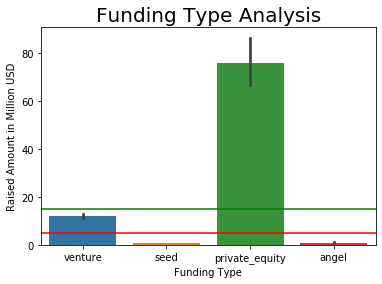

In [320]:
# plot 1
graph1=sns.barplot(x='funding_round_type', y='raised_amount_usd_million', data=plt1_data)
graph1.set(xlabel='Funding Type', ylabel='Raised Amount in Million USD')
graph1.set_title('Funding Type Analysis',fontsize =20)

plt.axhline(5, color='red')
plt.axhline(15, color='green')
plt.show()

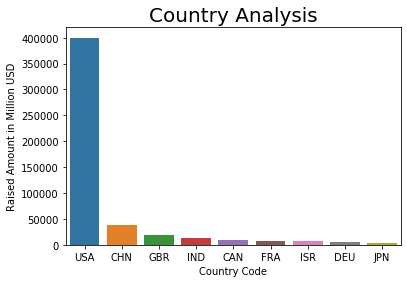

In [322]:
#plot 2
graph2=sns.barplot(x='country_code', y='raised_amount_usd_million', data=top9)
graph2.set(xlabel='Country Code', ylabel='Raised Amount in Million USD')
graph2.set_title('Country Analysis',fontsize =20)

plt.show()

In [323]:

country_with_top3_sectors=D1[D1['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','Cleantech / Semiconductors'])]

In [324]:
country_with_top3_sectors.shape

(7511, 20)

In [325]:
country_with_top3_sectors=country_with_top3_sectors.append(D2[D2['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','Cleantech / Semiconductors'])], ignore_index=True)


In [326]:
country_with_top3_sectors=country_with_top3_sectors.append(D3[D3['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','News, Search and Messaging'])], ignore_index=True)


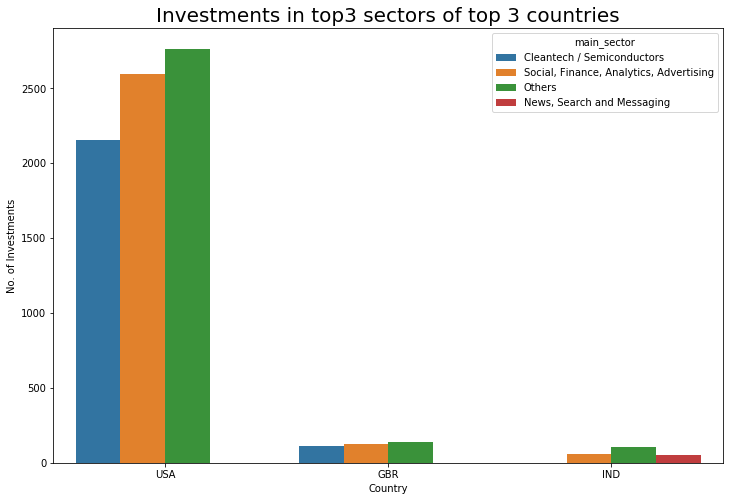

In [327]:
#plot 3
plt.figure(num=None, figsize=(12, 8))

graph3=sns.barplot(x='country_code', y='count_of_invest', hue="main_sector", data=country_with_top3_sectors)
graph3.set(xlabel='Country', ylabel='No. of Investments')
graph3.set_title('Investments in top3 sectors of top 3 countries',fontsize =20)
plt.show()

In [328]:
country_with_top3_sectors

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd_million,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,Primary_Sector,main_sector,count_of_invest,sum_of_invest
0,/organization/22nd-century-group,/funding-round/50617d7ea8eaa838e2fd8eb8dfe06054,venture,NaN,18-09-2014,10.000,/organization/22nd-century-group,22nd century group,http://www.xxiicentury.com,Biotechnology,ipo,USA,NY,NY - Other,Clarence,01/01/1998,Biotechnology,Cleantech / Semiconductors,2152,19785.534
1,/organization/23andme,/funding-round/97062e0d50c2955cbe40bf8220d87b08,venture,C,07-01-2011,9.000,/organization/23andme,23andme,http://23andme.com,Biotechnology|Search,operating,USA,CA,SF Bay Area,Mountain View,01/04/2006,Biotechnology,Cleantech / Semiconductors,2152,19785.534
2,/organization/23andme,/funding-round/c27c1b420dfb34677a6ba449524f1c88,venture,B,18-06-2009,12.600,/organization/23andme,23andme,http://23andme.com,Biotechnology|Search,operating,USA,CA,SF Bay Area,Mountain View,01/04/2006,Biotechnology,Cleantech / Semiconductors,2152,19785.534
3,/organization/23andme,/funding-round/f261366b4fbf1840ad71b20ea0d9c7ce,venture,A,03-10-2007,9.000,/organization/23andme,23andme,http://23andme.com,Biotechnology|Search,operating,USA,CA,SF Bay Area,Mountain View,01/04/2006,Biotechnology,Cleantech / Semiconductors,2152,19785.534
4,/organization/3-v-biosciences,/funding-round/069e2f1ded2f499d232c3d7ec762c0e2,venture,NaN,17-03-2015,14.279,/organization/3-v-biosciences,3-v biosciences,http://www.3vbio.com,Biotechnology,operating,USA,CA,SF Bay Area,Menlo Park,01/03/2007,Biotechnology,Cleantech / Semiconductors,2152,19785.534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8101,/organization/travelguru,/funding-round/58803fbf70b28cbc0a721859898678d3,venture,NaN,29-11-2006,15.000,/organization/travelguru,travelguru,http://www.travelguru.com,Career Planning|Curated Web|Transportation|Travel,acquired,IND,16,Mumbai,Mumbai,NaN,Career Planning,"Social, Finance, Analytics, Advertising",59,535.549
8102,/organization/connectm-technology-solutions,/funding-round/d6b855117c4da75810e0570b66004a06,venture,A,27-06-2007,6.000,/organization/connectm-technology-solutions,connectm technology solutions,http://www.connectm.com,Intellectual Asset Management|M2M|Mobility|Sec...,operating,IND,19,Bangalore,Bangalore,01/01/2007,Intellectual Asset Management,Others,103,940.290
8103,/organization/culturealley,/funding-round/e12b008b75901d1fa7dcd3ea4edb655b,venture,A,03-07-2015,6.500,/organization/culturealley,culturealley,http://culturealley.com/,Browser Extensions|Education|Facebook Applicat...,operating,IND,24,Jaipur,Jaipur,01/12/2012,Browser Extensions,"News, Search and Messaging",49,408.835
8104,/organization/easylink,/funding-round/f92ac5893a7701a416e76b8067f45e95,venture,NaN,13-04-2006,5.400,/organization/easylink,easylink,http://www.xlweb.com,Web Design|Web Development|Web Hosting,ipo,IND,25,Chennai,Chennai,14/04/1995,Web Design,"News, Search and Messaging",49,408.835
